In [2]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import librosa
import librosa.display
from getpass import getpass

**Importing The Dataset From Kaggle**

In [10]:
username = getpass('Enter the secret value: ')

Enter the secret value: ··········


In [7]:
key = getpass('Enter the secret value: ')

Enter the secret value: ··········


In [13]:
!echo '{"username":username,"key":key}' > /root/.kaggle/kaggle.json

In [14]:
!kaggle datasets download -d chrisfilo/urbansound8k

100% 5.61G/5.61G [02:00<00:00, 40.2MB/s]
100% 5.61G/5.61G [02:00<00:00, 50.0MB/s]


In [15]:
!unzip urbansound8k.zip

Streaming output truncated to the last 5000 lines.
  inflating: fold4/151877-5-1-0.wav  
  inflating: fold4/154758-5-0-0.wav  
  inflating: fold4/154758-5-0-1.wav  
  inflating: fold4/154758-5-0-10.wav  
  inflating: fold4/154758-5-0-11.wav  
  inflating: fold4/154758-5-0-12.wav  
  inflating: fold4/154758-5-0-13.wav  
  inflating: fold4/154758-5-0-14.wav  
  inflating: fold4/154758-5-0-15.wav  
  inflating: fold4/154758-5-0-16.wav  
  inflating: fold4/154758-5-0-17.wav  
  inflating: fold4/154758-5-0-18.wav  
  inflating: fold4/154758-5-0-19.wav  
  inflating: fold4/154758-5-0-2.wav  
  inflating: fold4/154758-5-0-20.wav  
  inflating: fold4/154758-5-0-21.wav  
  inflating: fold4/154758-5-0-3.wav  
  inflating: fold4/154758-5-0-4.wav  
  inflating: fold4/154758-5-0-5.wav  
  inflating: fold4/154758-5-0-6.wav  
  inflating: fold4/154758-5-0-7.wav  
  inflating: fold4/154758-5-0-8.wav  
  inflating: fold4/154758-5-0-9.wav  
  inflating: fold4/155320-3-0-0.wav  
  inflating: fold4/156362

In [16]:
data, sampling_rate = librosa.load('/content/fold1/102842-3-0-1.wav')

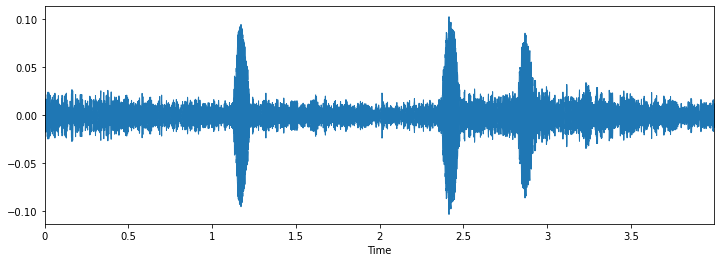

In [17]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [18]:
data = pd.read_csv('/content/UrbanSound8K.csv')
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [19]:
data.describe()

,fsID,start,end,salience,fold,classID
count,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000
mean,116033.493816,38.645409,42.253312,1.347000,5.385937,4.592877
std,57991.017218,74.292126,74.369669,0.476043,2.846820,2.894544
min,344.000000,0.000000,0.105962,1.000000,1.000000,0.000000
25%,69942.250000,3.000000,6.839398,1.000000,3.000000,2.000000
50%,118279.000000,10.376492,14.000000,1.000000,5.000000,4.000000
75%,166942.000000,35.131372,38.866979,2.000000,8.000000,7.000000
max,209992.000000,600.125356,604.125356,2.000000,10.000000,9.000000


In [20]:
appended = []
for i in range(1,11):
    appended.append(data[data.fold == i]['class'].value_counts())
    
class_distribution = pd.DataFrame(appended)
class_distribution = class_distribution.reset_index()
class_distribution['index'] = ["fold"+str(x) for x in range(1,11)]
class_distribution

,index,jackhammer,children_playing,street_music,drilling,dog_bark,air_conditioner,engine_idling,siren,car_horn,gun_shot
0,fold1,120,100,100,100,100,100,96,86,36,35
1,fold2,120,100,100,100,100,100,100,91,42,35
2,fold3,120,100,100,100,100,100,107,119,43,36
3,fold4,120,100,100,100,100,100,107,166,59,38
4,fold5,120,100,100,100,100,100,107,71,98,40
5,fold6,68,100,100,100,100,100,107,74,28,46
6,fold7,76,100,100,100,100,100,106,77,28,51
7,fold8,78,100,100,100,100,100,88,80,30,30
8,fold9,82,100,100,100,100,100,89,82,32,31
9,fold10,96,100,100,100,100,100,93,83,33,32


In [21]:
data['class'].value_counts(normalize=True)

engine_idling       0.114521
drilling            0.114521
dog_bark            0.114521
air_conditioner     0.114521
street_music        0.114521
jackhammer          0.114521
children_playing    0.114521
siren               0.106390
car_horn            0.049130
gun_shot            0.042831
Name: class, dtype: float64

**Loading The Data Into The Notebook**

In [178]:
iteration_number = 0

def parser(row):
  file_name = '/content/fold' + str(row.fold) + '/' + row.slice_file_name
  X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
  mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0) 

  feature = mels
  label = row.classID

  global iteration_number
  iteration_number += 1
  if (iteration_number % 100 == 0):
    print(iteration_number)
  return feature, label

In [179]:
transformed_data = data.apply(parser, axis = 1)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]


3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]


8400
8500
8600
8700


**Preprocessing The Data**

In [180]:
transformed_data = list(transformed_data)

In [181]:
transformed_data

[(array([2.69797547e-05, 2.21967508e-04, 2.99852749e-04, 5.58993837e-04,
         4.97501693e-04, 1.09185581e-03, 5.21071022e-03, 3.60704842e-03,
         3.06372158e-03, 1.18802616e-03, 7.44339137e-04, 1.55306910e-03,
         1.68587477e-03, 1.78815809e-03, 3.08344699e-03, 9.20674950e-03,
         6.60928572e-03, 4.82683210e-03, 1.55477244e-02, 4.24047075e-02,
         1.09496944e-01, 3.42491806e-01, 2.82804787e-01, 3.74672621e-01,
         1.72814012e+00, 6.56222010e+00, 2.73323369e+00, 4.23886061e+00,
         5.81836033e+00, 1.18872595e+01, 3.55266190e+01, 4.24196129e+01,
         5.75772209e+01, 1.75550156e+01, 1.13937807e+01, 1.45480423e+01,
         8.21746349e+00, 5.47192001e+00, 1.78719368e+01, 3.90714073e+01,
         1.45372334e+01, 1.98442364e+01, 1.02137671e+01, 5.77730989e+00,
         1.82431698e+00, 1.47294903e+00, 1.66704142e+00, 1.40265691e+00,
         2.94627643e+00, 7.24938536e+00, 3.97167850e+00, 1.76561642e+00,
         1.71385777e+00, 3.65817857e+00, 2.84887290

In [183]:
transformed_data = pd.DataFrame(transformed_data, columns = ['feature', 'label'])
transformed_data

,feature,label
0,"[2.6979755e-05, 0.00022196751, 0.00029985275, ...",3
1,"[0.04970262, 0.04953003, 0.037173897, 0.028717...",2
2,"[0.03085089, 0.02802173, 0.03644557, 0.0259697...",2
3,"[0.026512928, 0.032828856, 0.045829367, 0.0329...",2
4,"[0.061544705, 0.040471293, 0.02315449, 0.01584...",2
...,...,...
8727,"[0.017546661, 0.033808775, 0.0273695, 0.034648...",1
8728,"[0.00924126, 0.020001236, 0.016876899, 0.00827...",1
8729,"[0.016349208, 0.0628008, 0.06235607, 0.0646463...",1
8730,"[0.024181494, 0.07762727, 0.06354173, 0.032758...",1


In [184]:
X = np.array(transformed_data.feature.tolist())
Y = np.array(transformed_data.label.tolist())

In [185]:
X

array([[2.6979755e-05, 2.2196751e-04, 2.9985275e-04, ..., 2.1304718e-04,
        8.3691430e-06, 6.5687465e-07],
       [4.9702618e-02, 4.9530029e-02, 3.7173897e-02, ..., 3.5236479e-08,
        1.2702077e-08, 6.4472041e-09],
       [3.0850889e-02, 2.8021730e-02, 3.6445569e-02, ..., 1.5783629e-08,
        4.8800928e-09, 2.6501972e-09],
       ...,
       [1.6349208e-02, 6.2800802e-02, 6.2356070e-02, ..., 4.9559731e-06,
        7.7782926e-07, 1.8989341e-07],
       [2.4181494e-02, 7.7627271e-02, 6.3541733e-02, ..., 1.7742117e-07,
        4.5653412e-08, 1.8854319e-08],
       [3.6217667e-02, 5.4528892e-02, 9.4751962e-02, ..., 1.1651040e-06,
        3.4408734e-07, 1.8994537e-07]], dtype=float32)

In [186]:
Y

array([3, 2, 2, ..., 1, 1, 1])

In [233]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [234]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6985, 128)
(1747, 128)
(6985,)
(1747,)


In [235]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train, num_classes = 10)
Y_test = to_categorical(Y_test, num_classes = 10)

In [236]:
X_train = X_train.reshape(-1, 16, 8, 1)
X_test = X_test.reshape(-1, 16, 8, 1)

In [243]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6985, 16, 8, 1)
(1747, 16, 8, 1)
(6985, 10)
(1747, 10)


**Training The Model**

In [126]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, LSTM, SimpleRNN, Conv2D, MaxPool2D

In [237]:
model = Sequential([
  Conv2D(128, (2, 2), input_shape=(16, 8, 1), padding='same', activation='tanh'),
  MaxPool2D(pool_size=(2, 2)),
  Conv2D(256, (2, 2), padding='same', activation='tanh'),
  MaxPool2D(pool_size=(2, 2)),
  Dropout(0.2),
  Flatten(),
  Dense(1024, activation='tanh'),
  Dropout(0.1),
  Dense(512, activation='relu'),
  Dropout(0.1),
  Dense(10, activation='softmax')
])

In [242]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 16, 8, 128)        640       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 8, 4, 128)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 8, 4, 256)         131328    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 4, 2, 256)         0         
_________________________________________________________________
dropout_95 (Dropout)         (None, 4, 2, 256)         0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_96 (Dense)             (None, 1024)            

In [238]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [239]:
model.fit(X_train, Y_train, batch_size=50, epochs=200, validation_data=(X_test, Y_test))

Epoch 1/200
140/140 [==============================] - 2s 8ms/step - loss: 1.7674 - accuracy: 0.3759 - val_loss: 1.3189 - val_accuracy: 0.5718
Epoch 2/200
140/140 [==============================] - 1s 5ms/step - loss: 1.2483 - accuracy: 0.5715 - val_loss: 1.1643 - val_accuracy: 0.6171
Epoch 3/200
140/140 [==============================] - 1s 5ms/step - loss: 1.0320 - accuracy: 0.6494 - val_loss: 0.9747 - val_accuracy: 0.6749
Epoch 4/200
140/140 [==============================] - 1s 5ms/step - loss: 0.8801 - accuracy: 0.7062 - val_loss: 0.9304 - val_accuracy: 0.6949
Epoch 5/200
140/140 [==============================] - 1s 5ms/step - loss: 0.7758 - accuracy: 0.7342 - val_loss: 0.7996 - val_accuracy: 0.7459
Epoch 6/200
140/140 [==============================] - 1s 5ms/step - loss: 0.6809 - accuracy: 0.7674 - val_loss: 0.8296 - val_accuracy: 0.7321
Epoch 7/200
140/140 [==============================] - 1s 5ms/step - loss: 0.5883 - accuracy: 0.7950 - val_loss: 0.7372 - val_accuracy: 0.7802

**Evaluating The Model**

In [244]:
model.evaluate(X_test, Y_test)

55/55 [==============================] - 0s 3ms/step - loss: 1.3397 - accuracy: 0.8735


[1.3397096395492554, 0.8734974265098572]

We have achieved 87.35% accuracy on the testing data.

**Saving The Model**

In [240]:
model.save('SoundClassificationModel')

INFO:tensorflow:Assets written to: SoundClassificationModel/assets


In [241]:
!zip -r /content/file.zip /content/SoundClassificationModel

  adding: content/SoundClassificationModel/ (stored 0%)
  adding: content/SoundClassificationModel/saved_model.pb (deflated 89%)
  adding: content/SoundClassificationModel/assets/ (stored 0%)
  adding: content/SoundClassificationModel/variables/ (stored 0%)
  adding: content/SoundClassificationModel/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/SoundClassificationModel/variables/variables.index (deflated 66%)
